In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_sales = pd.read_csv('../data/desafio.csv')
df_sales = df_sales[(df_sales.capture_date < '2017-06-01')]

In [3]:
df_sales.head()

,order_id,code,quantity,price,pis_cofins,icms,tax_substitution,category,liquid_cost,order_status,capture_date,process_date,process_status,source_channel
0,bcb59c839e78b2601374cbad9239ca7b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500
1,4e91ee6b95895771dc9ee524e910a902,e6762ba2ffbca07ab6cee7551caeaad5,1,1036.29,95.8568,176.1693,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,em rota de entrega,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500
2,88eb0ac86af1a521c0831298d22dea8b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-12,2016-06-12,processado,b76eb9b8fc0f17098812da9117d3e500
3,dee418152a36314b4aee6ce9cf94fcbf,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,176.2020,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,cancelado,2016-06-13,0000-00-00,captado,b76eb9b8fc0f17098812da9117d3e500
4,1c175bc61b9b659bbf011b2e5e3dcec6,e6762ba2ffbca07ab6cee7551caeaad5,1,976.05,90.2846,0.0000,192.3325,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-13,2016-06-13,processado,b76eb9b8fc0f17098812da9117d3e500


In [4]:
df_sales['liquid_price'] = df_sales['price'] - df_sales['icms'] - df_sales['pis_cofins'] + df_sales['tax_substitution']
df_sales['revenue'] = df_sales['liquid_price'] - df_sales['liquid_cost'] 
df_sales['markup'] =  1. + (df_sales['revenue']/ df_sales['liquid_cost']) 
df_sales['capture_date'] = pd.to_datetime(df_sales['capture_date'], errors='coerce')
df_sales['week_number'] = df_sales['capture_date'].dt.strftime('%W').astype(int)
df_sales['month'] = df_sales['capture_date'].dt.strftime('%m').astype(int)

for col in ['pis_cofins', 'icms', 'tax_substitution']:
    df_sales[f'perc_{col}'] = round(df_sales[col] * 100/ df_sales['price'], 2)

for col in ['revenue', 'price', 'liquid_price', 'perc_pis_cofins', 'perc_icms',
       'perc_tax_substitution', 'liquid_cost','revenue', 'markup']:
    df_sales[f'unit_{col}'] = df_sales[col] / df_sales['quantity']


In [5]:
df_sales.head()

,order_id,code,quantity,price,pis_cofins,icms,tax_substitution,category,liquid_cost,order_status,...,perc_icms,perc_tax_substitution,unit_revenue,unit_price,unit_liquid_price,unit_perc_pis_cofins,unit_perc_icms,unit_perc_tax_substitution,unit_liquid_cost,unit_markup
0,bcb59c839e78b2601374cbad9239ca7b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,0.0,19.60,537.4868,978.90,1080.1933,9.25,0.0,19.60,542.7065,1.990382
1,4e91ee6b95895771dc9ee524e910a902,e6762ba2ffbca07ab6cee7551caeaad5,1,1036.29,95.8568,176.1693,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,em rota de entrega,...,17.0,0.00,221.5574,1036.29,764.2639,9.25,17.0,0.00,542.7065,1.408245
2,88eb0ac86af1a521c0831298d22dea8b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,0.0,19.60,537.4868,978.90,1080.1933,9.25,0.0,19.60,542.7065,1.990382
3,dee418152a36314b4aee6ce9cf94fcbf,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,176.2020,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,cancelado,...,18.0,0.00,169.4432,978.90,712.1497,9.25,18.0,0.00,542.7065,1.312219
4,1c175bc61b9b659bbf011b2e5e3dcec6,e6762ba2ffbca07ab6cee7551caeaad5,1,976.05,90.2846,0.0000,192.3325,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,0.0,19.71,535.3914,976.05,1078.0979,9.25,0.0,19.71,542.7065,1.986521


In [6]:
df_sales.capture_date.min(),df_sales.capture_date.max() 

(Timestamp('2016-06-01 00:00:00'), Timestamp('2017-05-31 00:00:00'))

In [7]:
df_sales.describe(percentiles=[.0001,.25, .50, .75, .90, .99, .9999])

,quantity,price,pis_cofins,icms,tax_substitution,liquid_cost,liquid_price,revenue,markup,week_number,...,perc_icms,perc_tax_substitution,unit_revenue,unit_price,unit_liquid_price,unit_perc_pis_cofins,unit_perc_icms,unit_perc_tax_substitution,unit_liquid_cost,unit_markup
count,178636.000000,178636.000000,178636.000000,178636.000000,178636.000000,178636.000000,178636.000000,178636.000000,178636.000000,178636.000000,...,178636.000000,178636.000000,178636.000000,178636.000000,178636.000000,178636.000000,178636.000000,178636.000000,178636.000000,178636.000000
mean,1.055028,234.592308,19.521447,25.089460,17.880944,136.044453,207.862345,71.817892,1.597614,25.435657,...,10.517845,7.846465,65.301352,224.469156,199.363092,8.169236,10.325303,7.796518,134.061740,1.522417
std,0.582198,186.535283,17.391412,32.330833,28.134371,83.558508,168.834695,128.264054,0.854602,16.064786,...,8.930759,14.605349,63.908712,129.491217,124.925340,2.892299,8.884014,14.608571,84.063802,0.372168
min,1.000000,1.030000,0.000000,0.000000,0.000000,4.114100,5.234300,-192.916000,0.096151,0.000000,...,0.000000,0.000000,-192.916000,1.030000,5.234300,0.000000,0.000000,0.000000,1.010544,0.096151
0.01%,1.000000,6.910000,0.000000,0.000000,0.000000,4.114100,5.658100,-70.401100,0.693275,0.000000,...,0.000000,0.000000,-70.401100,6.910000,5.658100,0.000000,0.000000,0.000000,3.271574,0.693275
25%,1.000000,149.910000,10.645575,0.000000,0.000000,78.862100,127.974500,24.321500,1.224804,11.000000,...,0.000000,0.000000,24.147800,149.400000,125.637812,9.250000,0.000000,0.000000,75.957600,1.213963
50%,1.000000,194.400000,17.519500,21.492000,0.000000,117.082000,175.970400,46.723650,1.479569,23.000000,...,17.000000,0.000000,45.917100,190.090000,171.152400,9.250000,17.000000,0.000000,116.627300,1.452685
75%,1.000000,309.232500,28.157000,38.880000,30.403000,205.899700,246.913500,97.035500,1.856645,41.000000,...,18.000000,18.230000,94.513675,299.900000,241.187375,9.250000,18.000000,18.230000,205.899700,1.831180
90%,1.000000,359.910000,33.244500,61.092000,68.875300,213.438200,366.587200,155.896700,2.082905,47.000000,...,18.000000,21.500000,146.060000,359.380000,356.365800,9.250000,18.000000,21.500000,213.438200,2.020142
99%,2.000000,849.227500,71.985675,136.764000,110.833965,496.929700,750.396100,399.353560,3.591713,52.000000,...,20.000000,27.120000,278.140020,799.900000,697.082245,9.250000,20.000000,27.120000,496.929700,2.355802


* The majority of the orders have 1 unity of product 
* An order with 100 itens seems to be a huge outlier since it is too farway from the 99.99% percentile. 
* The tax_substituion == 0 indicates sales within the same icms range (state maybe), need checks
* I'm missing some geolocation indicators
* Pis/Cofins == 0 for basic meal itens; soaps; bucal higiene; toilet paper; some books (digital books?); etc.

## Removing some outliers to keep a better view of the data

In [8]:
df_sales = df_sales[df_sales.quantity <= 20]
df_sales.describe(percentiles=[.0001,.25, .50, .75, .90, .99, .9999])

,quantity,price,pis_cofins,icms,tax_substitution,liquid_cost,liquid_price,revenue,markup,week_number,...,perc_icms,perc_tax_substitution,unit_revenue,unit_price,unit_liquid_price,unit_perc_pis_cofins,unit_perc_icms,unit_perc_tax_substitution,unit_liquid_cost,unit_markup
count,178620.000000,178620.000000,178620.000000,178620.000000,178620.000000,178620.000000,178620.000000,178620.000000,178620.000000,178620.000000,...,178620.000000,178620.000000,178620.000000,178620.000000,178620.000000,178620.000000,178620.000000,178620.000000,178620.000000,178620.000000
mean,1.051568,233.892332,19.468071,25.026670,17.880926,136.045407,207.278517,71.233109,1.593376,25.435903,...,10.517774,7.847149,65.293884,224.472583,199.367336,8.169945,10.326195,7.797216,134.073452,1.522443
std,0.412221,161.486755,15.538911,30.443843,28.134487,83.559797,148.569431,100.282577,0.682611,16.064583,...,8.930769,14.605824,63.902262,129.493681,124.927806,2.891458,8.883911,14.609039,84.058457,0.372170
min,1.000000,1.030000,0.000000,0.000000,0.000000,4.114100,5.234300,-192.916000,0.096151,0.000000,...,0.000000,0.000000,-192.916000,1.030000,5.234300,0.000000,0.000000,0.000000,1.612530,0.096151
0.01%,1.000000,6.910000,0.000000,0.000000,0.000000,4.114100,5.658100,-70.401100,0.693275,0.000000,...,0.000000,0.000000,-70.401100,6.910000,5.658100,0.000000,0.000000,0.000000,4.114100,0.693275
25%,1.000000,149.910000,10.644450,0.000000,0.000000,78.862100,127.974500,24.321500,1.224781,11.000000,...,0.000000,0.000000,24.143900,149.400000,125.644050,9.250000,0.000000,0.000000,75.957600,1.213963
50%,1.000000,194.400000,17.519500,21.492000,0.000000,117.082000,175.925850,46.697050,1.479435,23.000000,...,17.000000,0.000000,45.897500,190.090000,171.186200,9.250000,17.000000,0.000000,116.627300,1.452728
75%,1.000000,309.005000,28.157000,38.880000,30.403000,205.899700,246.913500,97.026400,1.856633,41.000000,...,18.000000,18.230000,94.470500,299.900000,241.196575,9.250000,18.000000,18.230000,205.899700,1.831241
90%,1.000000,359.910000,33.244500,61.092000,68.875140,213.438200,366.556100,155.863650,2.082645,47.000000,...,18.000000,21.500000,146.053700,359.380000,356.365800,9.250000,18.000000,21.500000,213.438200,2.020230
99%,2.000000,847.946800,71.699644,136.629000,110.877181,496.929700,749.808000,397.738987,3.582971,52.000000,...,20.000000,27.120000,278.081520,799.900000,697.098133,9.250000,20.000000,27.120000,496.929700,2.355949


Now not only the high sale value that was showing for one order has moved out but also the markup of 136% over the cost.

In [9]:
df_sales.to_csv('../data/clean_step1.csv', index=False)

## Verify the distributions

In [10]:
df_sales[['category', 'code', 'source_channel']].nunique()

category           11
code              131
source_channel     16
dtype: int64

In [11]:
def summary_dist(target_col, base_col='order_id', method='count'):
    if method == 'count':
        df_summary = df_sales[[target_col,base_col]].groupby(target_col).agg({base_col:pd.Series.nunique}).reset_index()
    else:
        df_summary = df_sales[[target_col,base_col]].groupby(target_col).agg({base_col:pd.Series.sum}).reset_index()
    df_summary[base_col] = df_summary[base_col] / df_summary[base_col].sum()  * 100
    return df_summary.sort_values(base_col)

In [12]:
summary_dist('order_status')

,order_status,order_id
4,cancelado não aprovado,0.001142
11,pendente processamento,0.002856
6,em rota de devolução,0.014281
16,suspenso barragem,0.017708
15,suspeita de fraude,0.017708
3,cancelado fraude confirmada,0.038844
10,fraude confirmada,0.090827
5,disponível para retirada.,0.119960
2,cancelado dados divergentes,0.375875
12,processado,0.492408


It is cool to perceive that 13% of the sales are cancelled

In [13]:
summary_dist('process_status')

,process_status,order_id
0,captado,13.829702
1,processado,86.170298


Maybe we should have to work with only the processed and delivered orders 
* Avoiding problems of last moment cancelations and impulse buyings

## Cleaning again

In [14]:
df_sales = df_sales[(df_sales.order_status == 'entrega total')]
df_sales.to_csv('../data/clean_step2.csv', index=False)

## Back to the distribution

In [15]:
df_orders_category = summary_dist('category')
df_orders_category

,category,order_id
1,4ece547755cba9e7fc14125bc895f31b,0.033155
2,568696c0b6828f77884ea8628fcc6200,0.034566
7,9cfa7aefcc61936b70aaec6729329eda,0.035271
10,f79dccaf0b890eced0724d8563948c4f,0.040915
8,d7ecf0071e88c21e993da125d2229a51,0.093821
3,61ad270def6d4b2403f4536f39cff29a,0.131914
5,98f679396a60f117b171ddedfcc3e5ed,0.172123
9,dda10a917a9ea3120e5d299af5105290,0.579857
4,90cc5bdd050bcd7cf0d50d079d0fda66,2.775132
6,9a97178a18aa6333aabdfb21de182b99,10.362658


* It is interesting to see that 85% of the orders are from 1 category 

In [16]:
df_products_category = summary_dist('category', base_col='code')
df_products_category

,category,code
2,568696c0b6828f77884ea8628fcc6200,0.769231
3,61ad270def6d4b2403f4536f39cff29a,0.769231
7,9cfa7aefcc61936b70aaec6729329eda,0.769231
8,d7ecf0071e88c21e993da125d2229a51,0.769231
1,4ece547755cba9e7fc14125bc895f31b,1.538462
6,9a97178a18aa6333aabdfb21de182b99,1.538462
9,dda10a917a9ea3120e5d299af5105290,1.538462
5,98f679396a60f117b171ddedfcc3e5ed,2.307692
10,f79dccaf0b890eced0724d8563948c4f,2.307692
4,90cc5bdd050bcd7cf0d50d079d0fda66,6.153846


* It is interesting to see that 80% of the products are from 1 category, the same wich holds 85% of the sales
* The category with 1.52% of the products corresponds to 10% of the sales.
* I'm missing a category description

In [17]:
df_products_category_quantity = summary_dist('category', base_col='quantity', method='sum')
df_products_category_quantity

,category,quantity
1,4ece547755cba9e7fc14125bc895f31b,0.030997
2,568696c0b6828f77884ea8628fcc6200,0.032316
7,9cfa7aefcc61936b70aaec6729329eda,0.036932
10,f79dccaf0b890eced0724d8563948c4f,0.039571
8,d7ecf0071e88c21e993da125d2229a51,0.087715
3,61ad270def6d4b2403f4536f39cff29a,0.125307
5,98f679396a60f117b171ddedfcc3e5ed,0.180705
9,dda10a917a9ea3120e5d299af5105290,0.749202
4,90cc5bdd050bcd7cf0d50d079d0fda66,2.848418
6,9a97178a18aa6333aabdfb21de182b99,10.508613


It seems that the quantity of products follows the amount of orders and the top 3 categories are the same.

In [18]:
df_products_category_revenue = summary_dist('category', base_col='revenue', method='sum')
df_products_category_revenue

,category,revenue
8,d7ecf0071e88c21e993da125d2229a51,0.003154
7,9cfa7aefcc61936b70aaec6729329eda,0.006182
10,f79dccaf0b890eced0724d8563948c4f,0.010041
3,61ad270def6d4b2403f4536f39cff29a,0.011643
2,568696c0b6828f77884ea8628fcc6200,0.067102
1,4ece547755cba9e7fc14125bc895f31b,0.123996
5,98f679396a60f117b171ddedfcc3e5ed,0.137704
9,dda10a917a9ea3120e5d299af5105290,1.168586
4,90cc5bdd050bcd7cf0d50d079d0fda66,5.899915
6,9a97178a18aa6333aabdfb21de182b99,10.964076


The ranking shfits a bit bringing the category, when the 90c category gets a higher share on revenue with a lower percentage of the quantity of sales. 

## Deep dive on the categories

In [19]:
top_4_cats_orders = df_orders_category.tail(4).category.values
top_4_cats_product_revenue = df_products_category_revenue.tail(4).category.values
top_4_cats_product_quantity = df_products_category_quantity.tail(4).category.values

selected_cats = list(set(list(top_4_cats_orders)+ list(top_4_cats_product_quantity)+ list(top_4_cats_product_revenue)))
selected_cats

['90cc5bdd050bcd7cf0d50d079d0fda66',
 '9a97178a18aa6333aabdfb21de182b99',
 '388128822cef4b4f102ae881e040a64b',
 'dda10a917a9ea3120e5d299af5105290']

In [20]:
selected_cols = ['category', 'code', 'source_channel','month', 'revenue', 'unit_price', 'unit_liquid_cost', 'unit_perc_pis_cofins', 'unit_perc_icms', 'unit_perc_tax_substitution', 'unit_markup', 'quantity', 'week_number']

In [21]:
df_filtered_sales = df_sales[selected_cols][
    df_sales.category.isin(selected_cats)]
df_filtered_sales.groupby('category').describe(percentiles=[.0001,.25, .50, .75, .90, .99, .9999]).T

category                           388128822cef4b4f102ae881e040a64b  \
month                      count                      124094.000000   
                           mean                            6.322280   
                           std                             3.635651   
                           min                             1.000000   
                           0.01%                           1.000000   
                           25%                             3.000000   
                           50%                             6.000000   
                           75%                            10.000000   
                           90%                            11.000000   
                           99%                            12.000000   
                           99.99%                         12.000000   
                           max                            12.000000   
revenue                    count                      124094.000000   
                           mean                           68.304613   
                           std                            85.079964   
                           min                          -110.874000   
                           0.01%                         -70.401100   
                           25%                            24.855375   
                           50%                            47.890100   
                           75%                            94.146300   
                           90%                           156.706800   
                           99%                           287.459719   
                           99.99%                       2451.322054   
                           max                          6892.060400   
unit_price                 count                      124094.000000   
                           mean                          217.698159   
                           std                           103.673363   
                           min                            34.840000   
                           0.01%                          36.857302   
                           25%                           136.515000   
                           50%                           199.000000   
                           75%                           309.722500   
                           90%                           356.290000   
                           99%                           471.945300   
                           99.99%                        587.115871   
                           max                           676.710000   
unit_liquid_cost           count                      124094.000000   
                           mean                          128.883724   
                           std                            68.086671   
                           min                             1.612530   
                           0.01%                           5.022571   
                           25%                            73.935100   
                           50%                           116.627300   
                           75%                           205.899700   
                           90%                           213.438200   
                           99%                           241.671500   
                           99.99%                        289.356300   
                           max                           289.356300   
unit_perc_pis_cofins       count                      124094.000000   
                           mean                            9.088374   
                           std                             0.965047   
                           min                             0.000000   
                           0.01%                           0.000000   
                           25%                             9.250000   
                           50%                             9.250000   
                        

Those 4 categories respond for almost all sales in the dataset, the distributions are very similar to the whole dataset itself.
* The category 9a97178a18aa6333aabdfb21de182b99 doens't have to pay pis/cofins
* the Category f79dccaf0b890eced0724d8563948c4f doens't have much orders 73 and have the lower prices on of the 4 including its costs with a low deviation.
* For the category 388128822cef4b4f102ae881e040a64b the price and cost deviation appear more Stable given the distribution percentiles, max, mean and deviations. Is that a price sentive one?
* Why the category dda as a zero tax substitution of its sales? 

In [22]:
df_sales.columns

Index(['order_id', 'code', 'quantity', 'price', 'pis_cofins', 'icms',
       'tax_substitution', 'category', 'liquid_cost', 'order_status',
       'capture_date', 'process_date', 'process_status', 'source_channel',
       'liquid_price', 'revenue', 'markup', 'week_number', 'month',
       'perc_pis_cofins', 'perc_icms', 'perc_tax_substitution', 'unit_revenue',
       'unit_price', 'unit_liquid_price', 'unit_perc_pis_cofins',
       'unit_perc_icms', 'unit_perc_tax_substitution', 'unit_liquid_cost',
       'unit_markup'],
      dtype='object')

In [23]:
df_product_cat_orders = pd.crosstab(
    df_filtered_sales.code, df_filtered_sales.category, margins=True, 
    values=df_filtered_sales.quantity, aggfunc=pd.Series.sum
).reset_index().sort_values('All')
df_product_cat_orders

category,code,388128822cef4b4f102ae881e040a64b,90cc5bdd050bcd7cf0d50d079d0fda66,9a97178a18aa6333aabdfb21de182b99,dda10a917a9ea3120e5d299af5105290,All
89,b3fca69c356bec270dc3a90f8b498883,NaN,NaN,NaN,2.0,2
77,8e5d2c3f2476cb5c507dd0f00f6eabda,NaN,45.0,NaN,NaN,45
95,c27a276b623c751a6b0a8ad6243d681d,46.0,NaN,NaN,NaN,46
38,411e1404e183718207628232e91ce5a9,NaN,74.0,NaN,NaN,74
57,5bcebbc4f704cffaf2e6ccaf1d1fb5c7,74.0,NaN,NaN,NaN,74
82,a36f5dfa4f08cdfe64594061ba76f30e,77.0,NaN,NaN,NaN,77
102,ce4baabfbcb1d43e22f7ba44b49f2714,87.0,NaN,NaN,NaN,87
84,a7772a34be22f0fd09f0ef36b6eb337f,113.0,NaN,NaN,NaN,113
111,e6017ce062eb324ab446e9983afba369,125.0,NaN,NaN,NaN,125
107,d709ff164dc53eb7b8470e84c2b60974,126.0,NaN,NaN,NaN,126


In [24]:
df_product_cat_orders.notna().sum(axis = 0)


category
code                                119
388128822cef4b4f102ae881e040a64b    107
90cc5bdd050bcd7cf0d50d079d0fda66      9
9a97178a18aa6333aabdfb21de182b99      3
dda10a917a9ea3120e5d299af5105290      3
All                                 119
dtype: int64

 * The category 388, not only is the highest in sales by fart but contains much of the variety of products. 
 Although the category 9a9 has the sconde most sold product.
 * The proucts 4534ea61b50410b3b6243e02b40c8cd1 and 7e3713530b46887cff58a2e2ac433ac5 bug me a bit. 

In [25]:
df_product_cat_orders = pd.crosstab(
    df_filtered_sales.code, df_filtered_sales.category, margins=True, 
    values=df_filtered_sales.revenue, aggfunc=pd.Series.sum
).reset_index().sort_values('All')
df_product_cat_orders

category,code,388128822cef4b4f102ae881e040a64b,90cc5bdd050bcd7cf0d50d079d0fda66,9a97178a18aa6333aabdfb21de182b99,dda10a917a9ea3120e5d299af5105290,All
89,b3fca69c356bec270dc3a90f8b498883,NaN,NaN,NaN,-20.0513,-2.005130e+01
95,c27a276b623c751a6b0a8ad6243d681d,1.737475e+03,NaN,NaN,NaN,1.737475e+03
57,5bcebbc4f704cffaf2e6ccaf1d1fb5c7,2.927740e+03,NaN,NaN,NaN,2.927740e+03
107,d709ff164dc53eb7b8470e84c2b60974,3.769438e+03,NaN,NaN,NaN,3.769438e+03
111,e6017ce062eb324ab446e9983afba369,4.093586e+03,NaN,NaN,NaN,4.093586e+03
82,a36f5dfa4f08cdfe64594061ba76f30e,4.529519e+03,NaN,NaN,NaN,4.529519e+03
63,60424117a2618c7184687046fa5693c4,4.874974e+03,NaN,NaN,NaN,4.874974e+03
16,213005fe5d815c539812614f1f6a7768,6.018461e+03,NaN,NaN,NaN,6.018461e+03
18,24549e47832f72f647d40a86b43b6925,6.622648e+03,NaN,NaN,NaN,6.622648e+03
15,1f12f1e1b9e7a20d4ad9dd549ec072c0,7.088561e+03,NaN,NaN,NaN,7.088561e+03


In [26]:
df_product_cat_orders.notna().sum(axis = 0)


category
code                                119
388128822cef4b4f102ae881e040a64b    107
90cc5bdd050bcd7cf0d50d079d0fda66      9
9a97178a18aa6333aabdfb21de182b99      3
dda10a917a9ea3120e5d299af5105290      3
All                                 119
dtype: int64

* Not only the product 7e3713530b46887cff58a2e2ac433ac5 bugs me but it has a high revenue standing on the top the rank of this categories.

# Season movement 

In [27]:
def plot_season_sales(df, target_col, base_col='month'):
    df = df[[base_col, target_col]].groupby(base_col).sum().reset_index()
    return sns.lineplot(x=df[base_col], y=df[target_col])


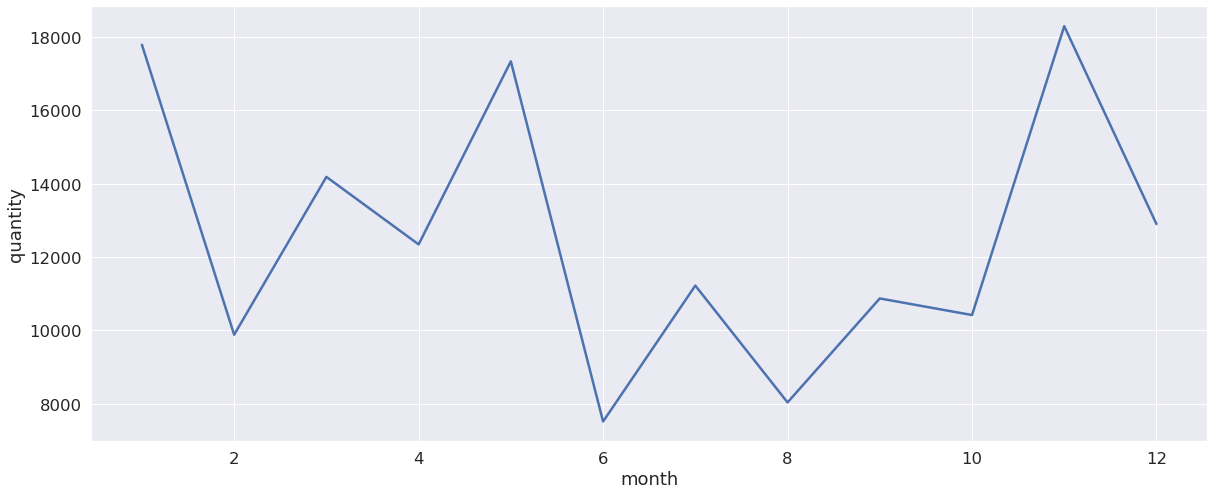

In [28]:
ax = plot_season_sales(df_filtered_sales,'quantity')
plt.show()

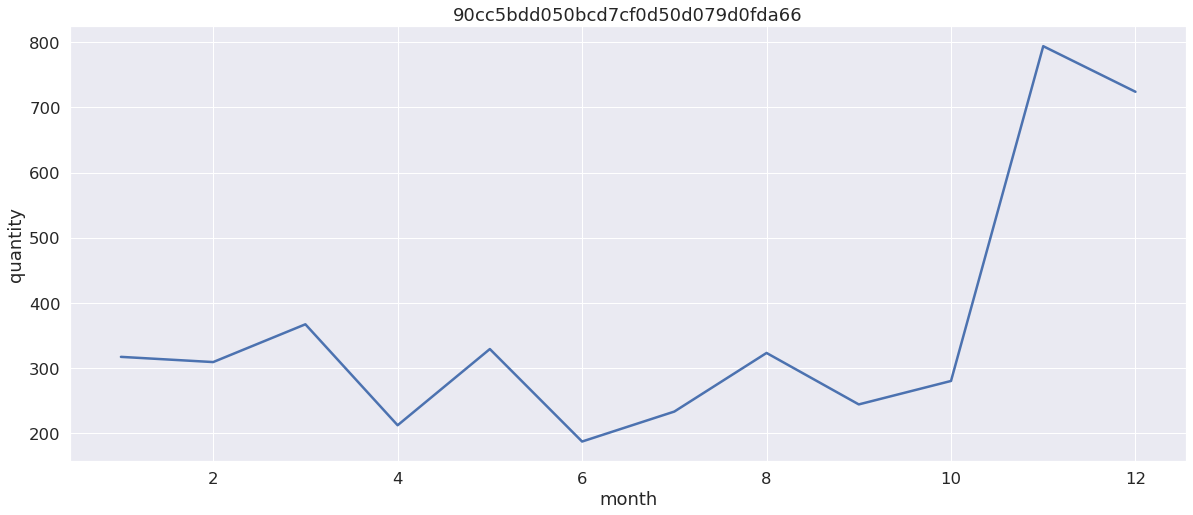

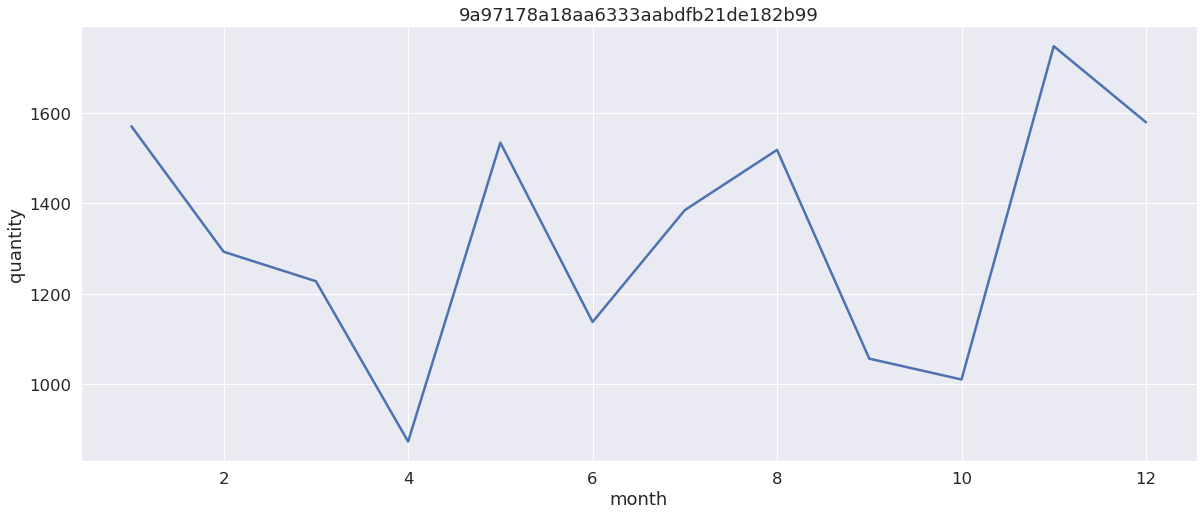

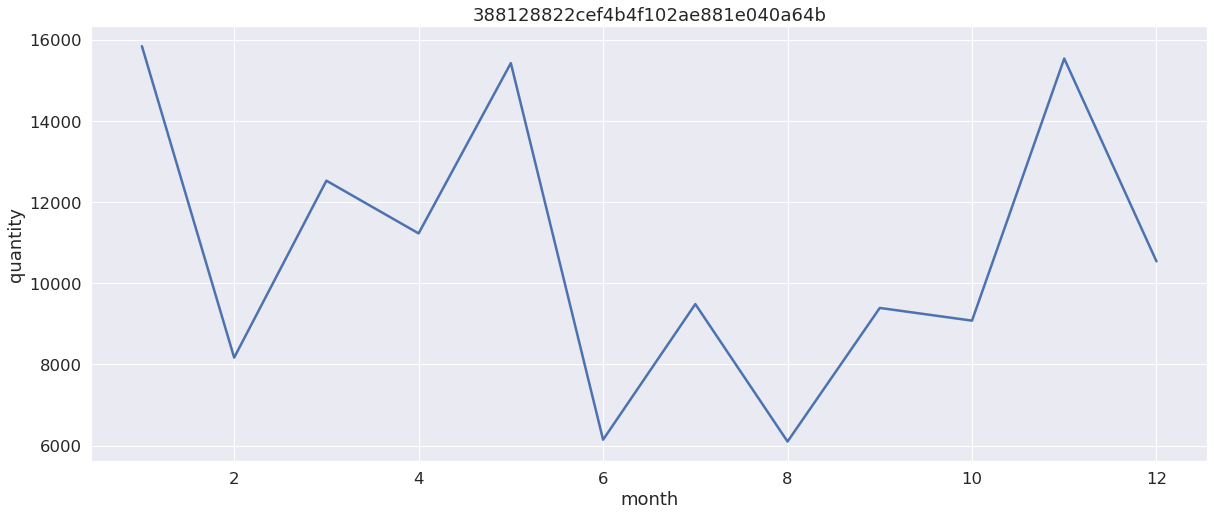

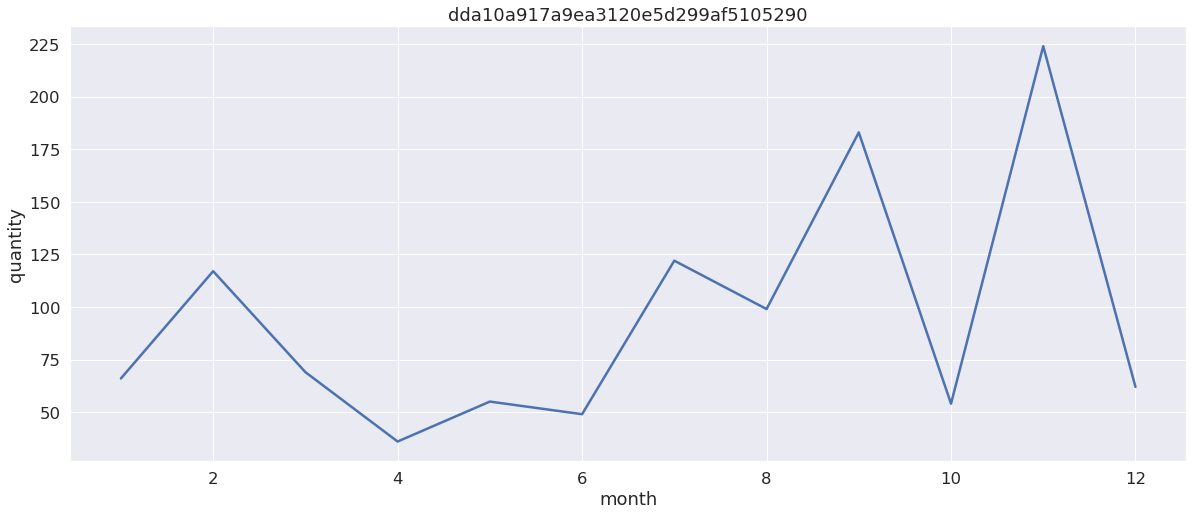

In [29]:
for cat in selected_cats: 
    df = df_filtered_sales[df_filtered_sales.category == cat]
    ax = plot_season_sales(df,'quantity')
    ax.set_title(cat)
    plt.show()

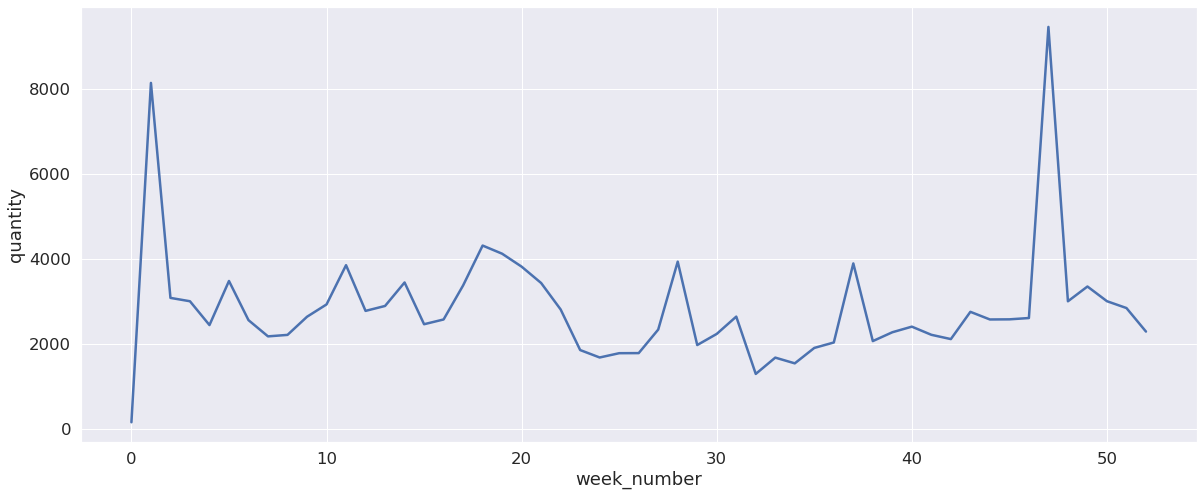

In [30]:
ax = plot_season_sales(df_filtered_sales,'quantity', base_col='week_number')
plt.show()

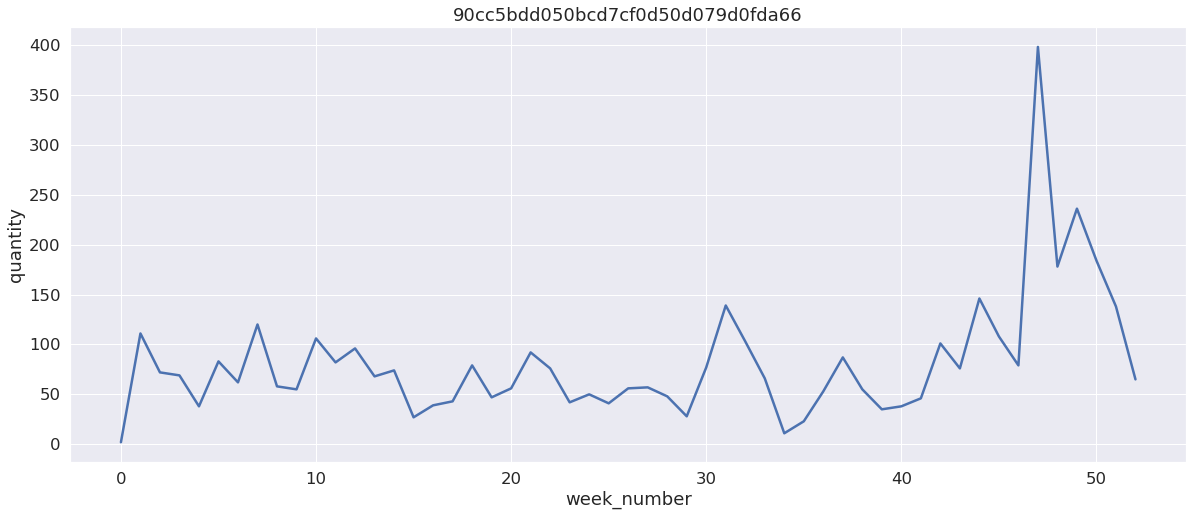

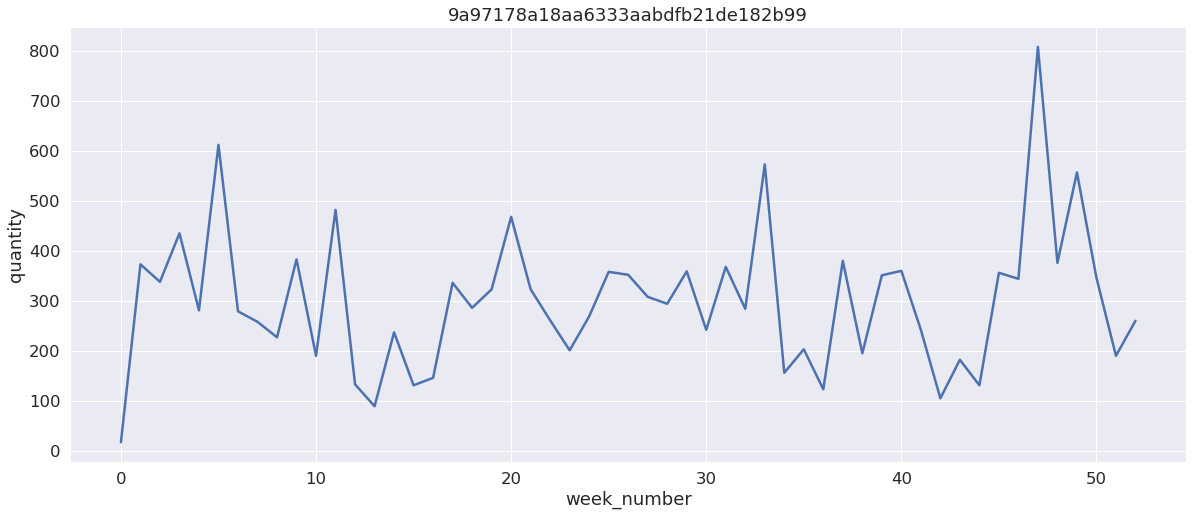

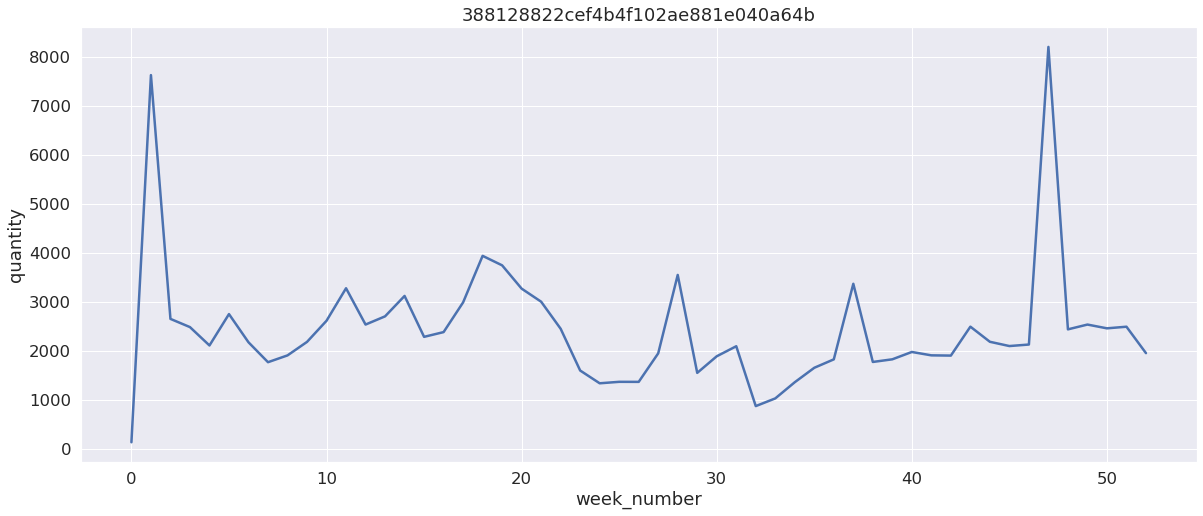

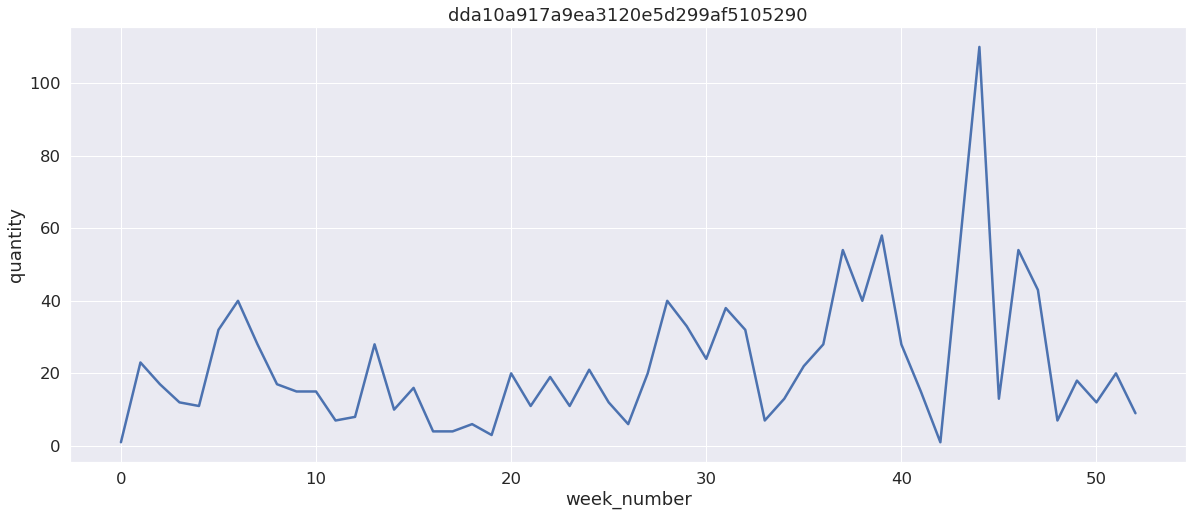

In [31]:
for cat in selected_cats: 
    df = df_filtered_sales[df_filtered_sales.category == cat]
    ax = plot_season_sales(df,'quantity', base_col='week_number')
    ax.set_title(cat)
    plt.show()

### Quantity
* The sales peak for the whole orders are on jan, may and november with some increase on dec.
* Category 90cc seems to increase quantities on November, december with a whole year stable. 
* There was a peack on september and november for dda
* 9a9 had peaks on may, august and november, december 
* 388 had peacks on ay and november, january
* Christmas, couples and blackfridays? 

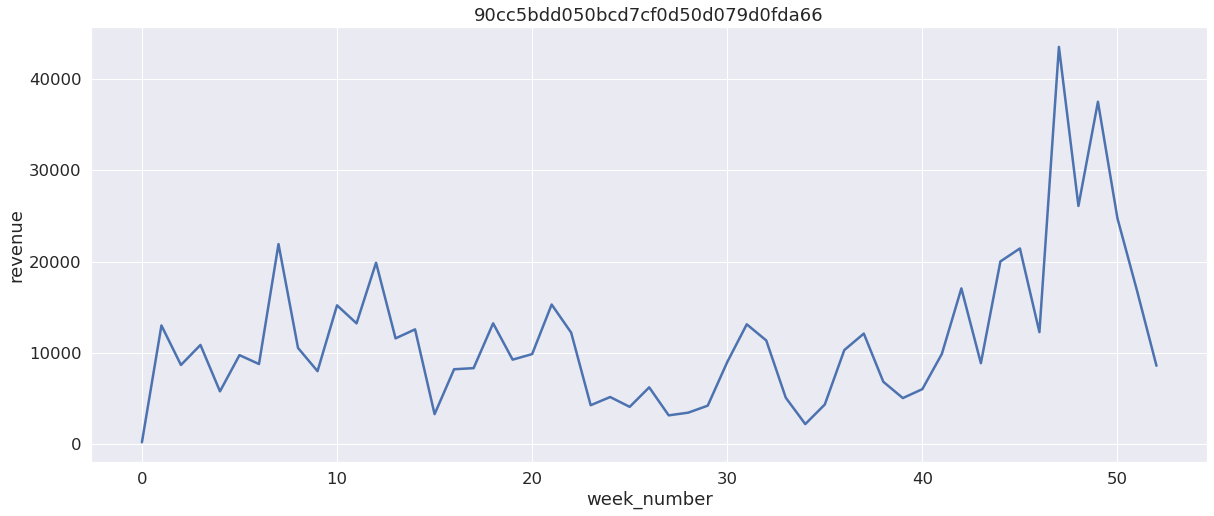

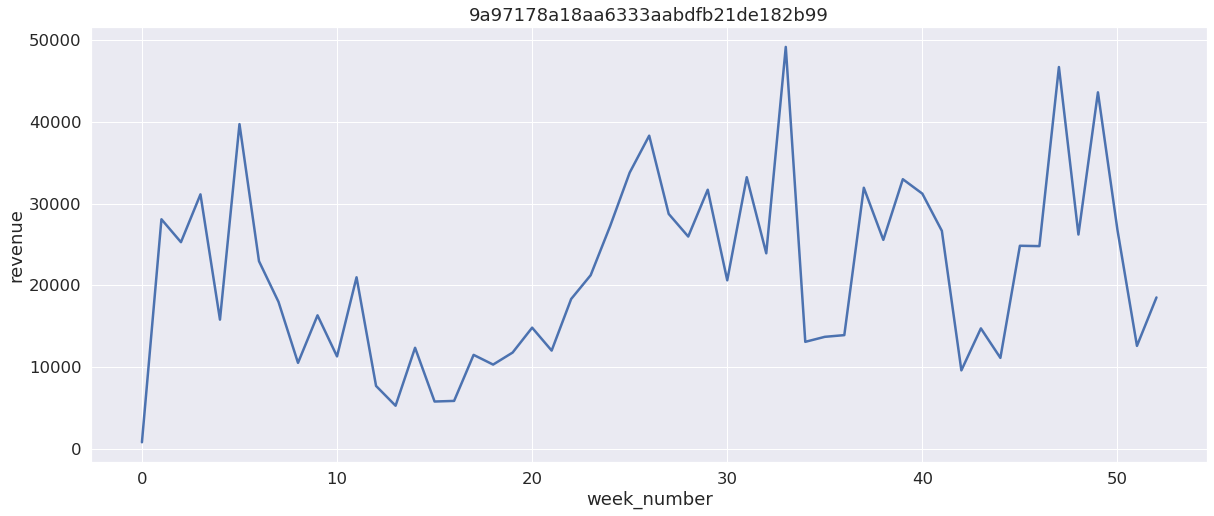

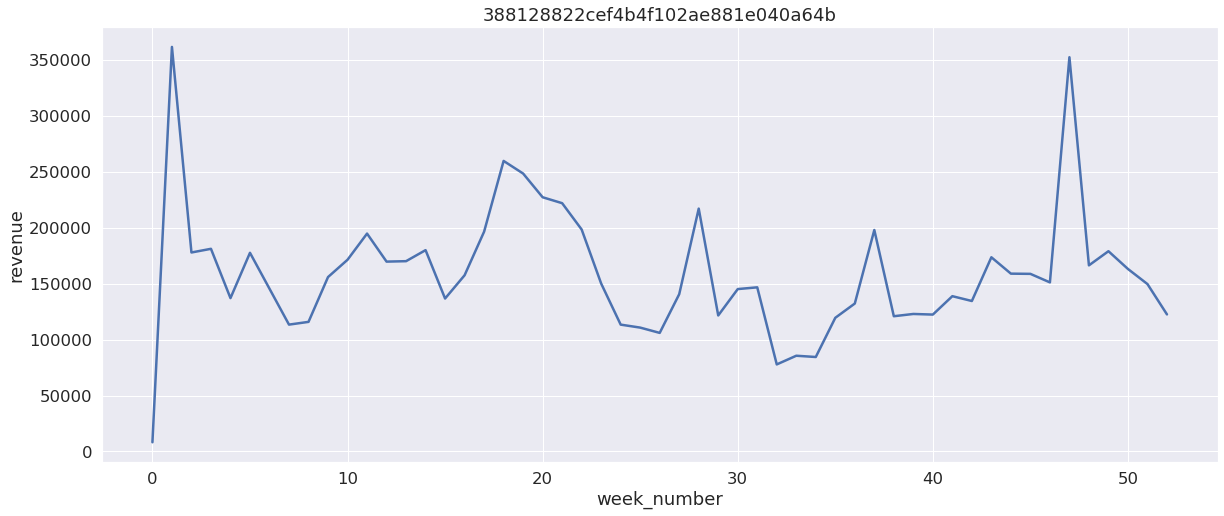

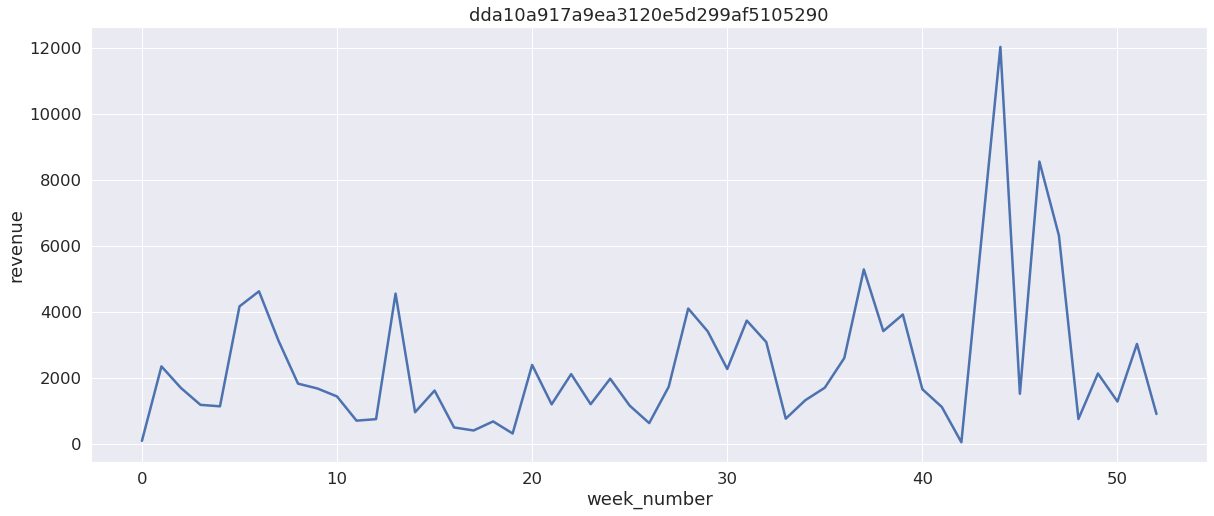

In [32]:
for cat in selected_cats: 
    df = df_filtered_sales[df_filtered_sales.category == cat]
    ax = plot_season_sales(df,'revenue', base_col='week_number')
    ax.set_title(cat)
    plt.show()

### Revenue
As for it seems to be following the same pattern as the quantities.